In [98]:
from nsepython import *
import pandas as pd
import numpy as np
import datetime
import math
import requests
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import time

In [1]:
#print(fnolist())

In [71]:
#optionchain = nse_optionchain_scrapper('BANKNIFTY')
optionchain = nse_optionchain_scrapper('BANKNIFTY')['records']['data']

In [7]:
EXPIRY_DATE = '21-Jul-2022'
optionchain = nse_optionchain_scrapper('BANKNIFTY')['records']['data']

def get_strikes(optionchain, spot, size = 6):
    strikes = list(set([i['strikePrice'] for i in optionchain]))
    strikes.sort()
    itm = 0
    for i in range(len(strikes)):
        if(strikes[i] > spot):
            itm = i
            break
    diff = strikes[itm] - strikes[itm-1]
    return [x for x in range(strikes[itm-6],strikes[itm+6], diff)]

def read_data(optionchain, spot_price, res = None):
    #spot = 
    strikes = get_strikes(optionchain, spot_price)
    if res is None:
        res = {'size':0}
    res['size'] += 1
    for x in optionchain:
        if(x['expiryDate'] == EXPIRY_DATE and x['strikePrice'] in strikes):
            if(x['strikePrice'] not in res):
                size = res['size'] - 1
                res[x['strikePrice']] = ([0]*size,[0]*size)
            res[x['strikePrice']][0].append(x['CE']['openInterest'])
            res[x['strikePrice']][1].append(x['PE']['openInterest'])
    #append zeroes for far OTM options
    for x in res.keys():
        if x != 'size' and len(res[x][0]) < res['size']:
            res[x][0].append(0)
            res[x][1].append(1)
    return res

def get_OTM_premiums(optionchain, spot_price):
    strikes = get_strikes(optionchain, spot_price, 10)
    strikes = [strikes[0], strikes[-1]]
    for x in optionchain:
        if(x['expiryDate'] == EXPIRY_DATE and x['strikePrice'] == strikes[0]):
            if(x['strikePrice'] not in res):
                res[x['strikePrice']] = []
            res[x['strikePrice']].append((x['CE']['openInterest'], x['PE']['openInterest']))

In [122]:
optionchain = nse_optionchain_scrapper('BANKNIFTY')['records']['data']
res = read_data(optionchain, 35400, res)

In [76]:
res = read_data(optionchain, 35300, res)

In [121]:
timeArr = ["09:50","09:55", "10:00","10:05", "10:10", "10:15", "10:20", "10:30","10:50"]

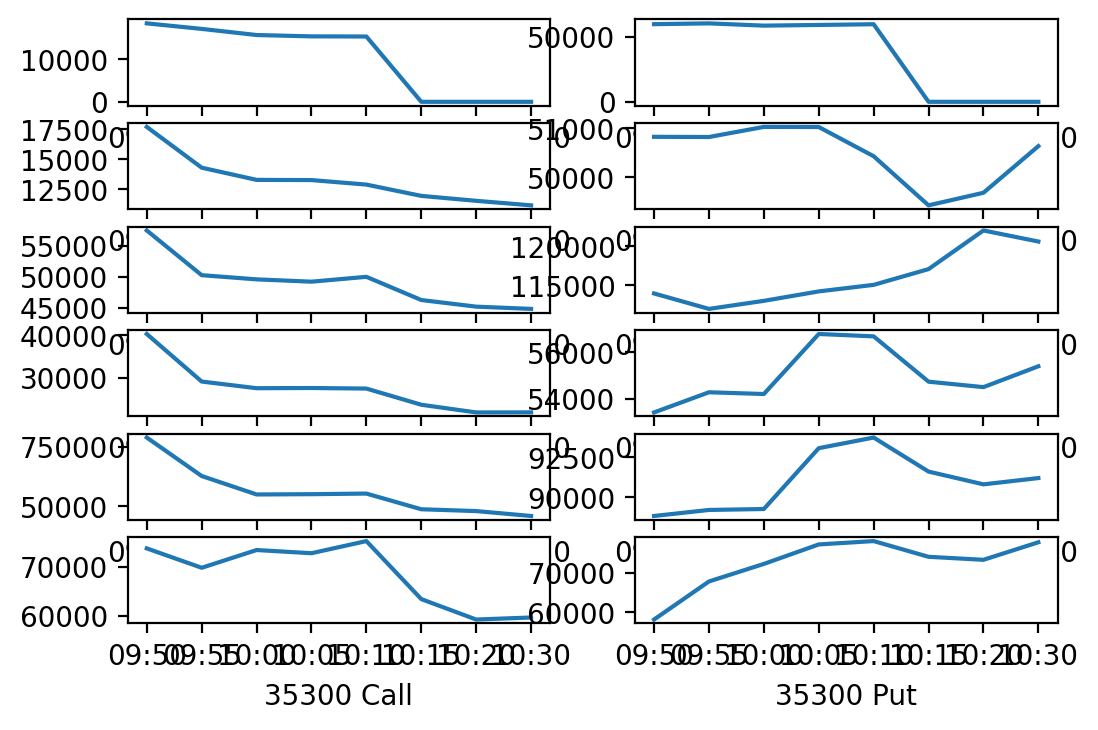

In [120]:
fig, ax = plt.subplots(nrows=6, ncols=2)
matplotlib.rcParams['figure.dpi'] = 200
keys = list(res.keys())[1:]
for i in range(3,9):
    i1=i-3
    ax[i1,0].plot(timeArr, res[keys[i1]][0])
    ax[i1,0].set_xlabel("{} Call".format(keys[i1]))
    ax[i1,1].plot(timeArr, res[keys[i1]][1])
    ax[i1,1].set_xlabel("{} Put".format(keys[i1]))
    

In [31]:
time = [(datetime.datetime.now())-datetime.timedelta(minutes = -5), (datetime.datetime.now())]
time = [i.strftime("%H:%M") for i in time]
time

['16:47', '16:42']

In [107]:
timeArr.shape

AttributeError: 'list' object has no attribute 'shape'

In [9]:
call_oi, put_oi = res['filtered']['CE']['totOI'], res['filtered']['PE']['totOI']
call_oi, put_oi

(547274, 451482)

In [14]:
ceArr, peArr = [], []
for i in res['filtered']['data']:
    ce, pe = i['CE'], i['PE']
    #datArr.append({'strike':i['strikePrice'], 'call_oi':ce['openInterest'], 'call_oi_change':ce['changeinOpenInterest'],
    #              'call_vol':ce['totalTradedVolume']})
    ceArr.append({'strike':i['strikePrice'], 'oi':ce['openInterest'], 'oi_change':ce['changeinOpenInterest'],'vol':ce['totalTradedVolume']})
    peArr.append({'strike':i['strikePrice'], 'oi':pe['openInterest'], 'oi_change':pe['changeinOpenInterest'],'vol':pe['totalTradedVolume']})
    
ceDat = pd.DataFrame(ceArr)
peDat = pd.DataFrame(peArr)
#ceDat.head(50)

In [16]:
 #-H "Cookie: _ga=GA1.2.1750058275.1612242990; session=.eJw9zLEOgjAUheF3uTM1qRSpTJK0Ghc1alzJBW-R2BZTqovx3cVB1i__OW-QNSFxIxheSTIh0wWruSG2nKeC59hkMsuhgIB3Gm4valu06Fatw87Omt5BAtWDgkNPPkIRw5MSMF0YokdH03DMLE72vxk19PYnSq-3O602uirVpdofTudjCZ8vlZ0ywA.YQ_7ag.0iJ722wtb774R1zaabxgFmPVnvU; _gid=GA1.2.54816546.1628157026; SRVNAME=SB; _gat=1"
 #   -H "Sec-Fetch-Dest: empty" -H "Sec-Fetch-Mode: cors" -H "Sec-Fetch-Site: same-origin"

get_oi_data_opstra():
    
    url = "https://opstra.definedge.com/api/openinterest/NIFTY&12AUG2021"
    column_values = ['timestamp', 'open', 'high', 'low', 'close','temp']
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:90.0) Gecko/20100101 Firefox/90.0',
        'Accept': 'application/json, text/plain, */*',
        'Accept-Language': 'en-US,en;q=0.5',
        'Connection': 'keep-alive',
        'Referer': 'https://opstra.definedge.com/openinterest',
        'Cookie': '_ga=GA1.2.1750058275.1612242990; session=.eJw9zLEOgjAUheF3uTM1qRSpTJK0Ghc1alzJBW-R2BZTqovx3cVB1i__OW-QNSFxIxheSTIh0wWruSG2nKeC59hkMsuhgIB3Gm4valu06Fatw87Omt5BAtWDgkNPPkIRw5MSMF0YokdH03DMLE72vxk19PYnSq-3O602uirVpdofTudjCZ8vlZ0ywA.YQ_7ag.0iJ722wtb774R1zaabxgFmPVnvU; _gid=GA1.2.54816546.1628157026; SRVNAME=SB; _gat=1',
        'Sec-Fetch-Dest': 'empty',
        'Sec-Fetch-Mode': 'cors',
        'Sec-Fetch-Site': 'same-origin'
    }
    response = requests.get(url, headers=headers)
    return response.json()
dat = response.json()['data']